# Evaluation of the face recognition algorithm 
## Coparison between performance on faces dataset and non faces datasets
The algorithm is run on four different datasets (photos of cats, photos of dogs, photos of flowers and photos of people).

In [ ]:
import cv2
import os
import face_detection
import numpy


detector = face_detection.Detector()

In [3]:
# define a function that applies the algorithm to an array of images and prints results
def apply_detection(directory):
    length = 0
    detected = 0
    path = os.path.join(os.getcwd(), directory)
    for image in os.listdir(path):
        length += 1
        if len(detector.predict(img=cv2.imread(os.path.join(path, image)))) > 0:
            detected += 1
    print("Total number of images: " + str(length))
    print("Number of images with faces detected: " + str(detected))
    print("Proportion of images recognized as images of faces: " + str(100*detected/length) + "%")

### Cats

In [3]:
apply_detection("cats")

Total number of images: 9993
Number of images with faces detected: 1276
Proportion of images recognized as images of faces: 12.768938256779746%


### Dogs

In [4]:
apply_detection("dogs")

Total number of images: 20580
Number of images with faces detected: 5935
Proportion of images recognized as images of faces: 28.83867832847425%


### Flowers

In [5]:
apply_detection("flowers")

Total number of images: 4313
Number of images with faces detected: 392
Proportion of images recognized as images of faces: 9.088801298400185%


### People
Each image in the dataset depicts exactly one person.

In [48]:
apply_detection("people")

Total number of images: 1052
Number of images with faces detected: 1048
Proportion of images recognized as images of faces: 99.61977186311788%


### Observations
- Detector almost always detects faces when they are present, error rate is less than 0.5%.
- Animal snouts are relatively often mistaken for human faces. This effect is more prominent with dogs than with cats.
- Detector sometimes finds faces within images that don't contain any faces, although this effect might be hightened by flawed data, for example cat images with people present in the background.
<br>
<br>
***
## Performance on images with multiple faces

In [47]:
# detect faces in images
path = os.path.join(os.getcwd(), "groups")
n = len(os.listdir(path))
groups = [0]*10
guessed = [0]*10
error = [0]*10
abserror = [0]*10
errors = [[], [], [], [], [], [], [], [], [], []]
for image in os.listdir("groups"):
    value = int(image.split('_')[0])
    category = value - 2
    if (category > 9): 
        category = 9
    result = len(detector.predict(img=cv2.imread(os.path.join(path, image))))
    err = result - value
    errors[category].append(err)
    if err == 0:
        guessed[category] += 1
    groups[category] += 1
    error[category] += err
    abserror[category] += abs(err)

### Percentage of correct guesses
#### Overall

In [7]:
correct = sum(guessed)
print("Total number of tested images: " + str(n))
print("Number of images in which the algorithm detected the right number of faces " + str(correct))
print("Success rate: " + str(100*correct/n) + "%")

Total number of tested images: 5681
Number of images in which the algorithm detected the right number of faces 3833
Success rate: 67.47051575426862%


#### By actual faces quantity within images

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# histogram drawing function
def histogram(data,title,xlabel,ylabel):
    fig = plt.figure()
    ax = fig.subplots()
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.bar(numpy.array(list(range(1, len(data) + 1))), numpy.array(data))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_xticks(range(1, 11))
    ax.set_xticklabels(["2", "3", "4", "5", "6", "7", "8", "9", "10", ">10"])
    plt.show()

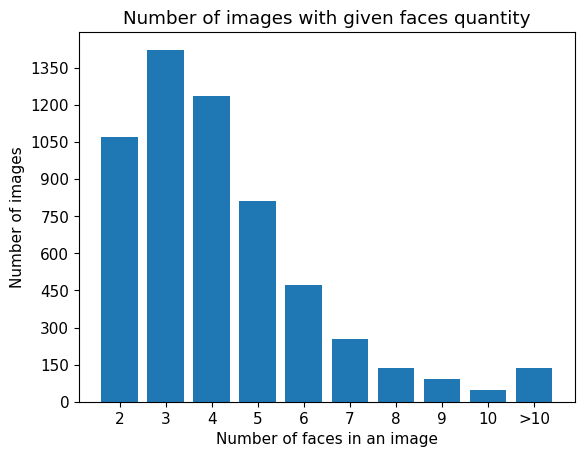

In [34]:
histogram(groups, "Number of images with given faces quantity", "Number of faces in an image", "Number of images")

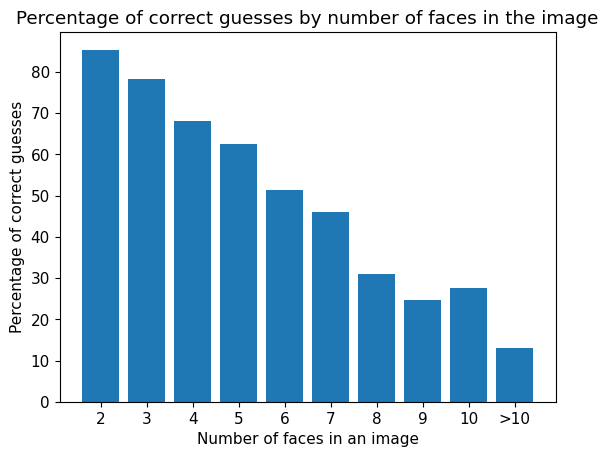

In [37]:
histogram(numpy.array([a/b for a,b in zip(guessed,groups)])*100, "Percentage of correct guesses by number of faces in the images", "Number of faces in an image", 
          "Percentage of correct guesses")

### Average error

In [39]:
print("Average error: " + str(sum(error)/n))
print("Average absolute error: " + str(sum(abserror)/n))

Average error: -0.4479845097694068
Average absolute error: 0.5954937511001585


### Error by actual faces quantity

In [54]:
# boxplot drawing function
def boxplot(data, ylabel, title):
    plt.figure(figsize=(7,6))
    plt.boxplot(data, labels=["2", "3", "4", "5", "6", "7", "8", "9", "10", ">10"])
    plt.xlabel("Number of faces in an image")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

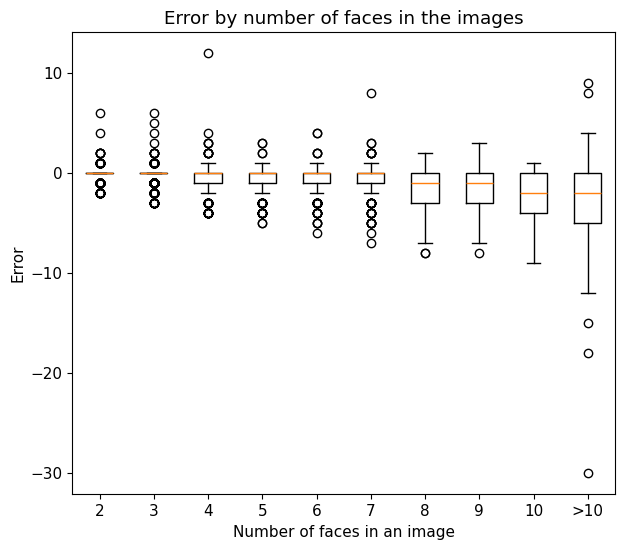

In [49]:
boxplot(errors)

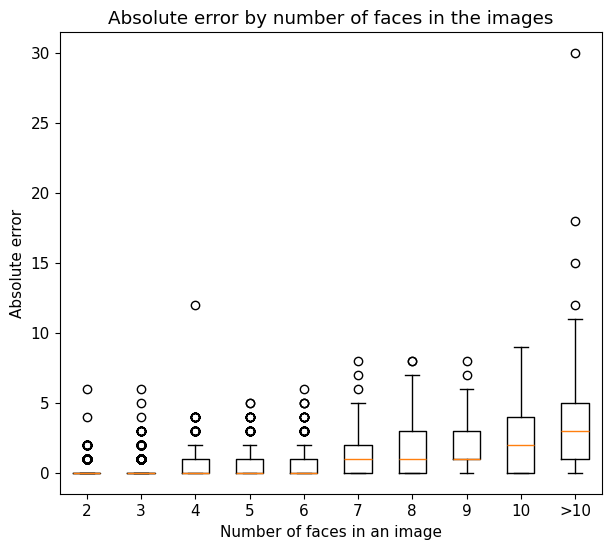

In [55]:
boxplot([numpy.abs(errors[0]), numpy.abs(errors[1]), numpy.abs(errors[2]), numpy.abs(errors[3]), numpy.abs(errors[4]),
         numpy.abs(errors[5]), numpy.abs(errors[6]), numpy.abs(errors[7]), numpy.abs(errors[8]), numpy.abs(errors[9])], "Absolute error", 
         "Absolute error by number of faces in the images")

### Observations
- The more faces are present in the image the less likely it becomes that the detector will find their correct quantity.
- Error variance increases in a similar manner.
- Decrease in overall likelyhood of detecting the correct number of faces seems to be linear with regards to the number of faces present (although it is unclear whether this observation can be extrapolated for images with more than 9 faces).
- When multiple faces are present the detector is more likely to miss some rather than return false positives as evident by negative average error. However, the opposite scenario does occur as well, just will less frequency.
- For images with 2 or 3 faces the detector is still fairly accurate as evident by box plots reduced to vertical lines (albeit outliers are present).
- For images with less than 8 faces the average error is roughly zero. The tendency to miss faces rather than detect non-existing ones mostly applies to images with face quantity equal to or greater than 8.
<br>
<br>
***
## Performance on camera input
Algorithm is run on a sample video recorded via laptop's camera depicting a single person making different facial expressions and rotating their head.

In [ ]:
# code goes here

### Observations
- etwas
- etwas
- etwas